Lab 2

Create Dataset

In [28]:
import pandas as pd
import numpy as np

def getDataset(file_title):
    data = pd.read_csv(file_title, sep=',', encoding='cp1252')
    return data

dataset = getDataset("frogs.csv")



Check info about dataset

In [29]:
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  212 non-null    int64  
 1   pres.abs    212 non-null    int64  
 2   northing    212 non-null    int64  
 3   easting     212 non-null    int64  
 4   altitude    212 non-null    int64  
 5   distance    212 non-null    int64  
 6   NoOfPools   212 non-null    int64  
 7   NoOfSites   212 non-null    int64  
 8   avrain      212 non-null    float64
 9   meanmin     212 non-null    float64
 10  meanmax     212 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 18.3 KB


,Unnamed: 0,pres.abs,northing,easting,altitude,distance,NoOfPools,NoOfSites,avrain,meanmin,meanmax
0,2,1,115,1047,1500,500,232,3,155.000000,3.566667,14.000000
1,3,1,110,1042,1520,250,66,5,157.666667,3.466667,13.800000
2,4,1,112,1040,1540,250,32,5,159.666667,3.400000,13.600000
3,5,1,109,1033,1590,250,9,5,165.000000,3.200000,13.166667
4,6,1,109,1032,1590,250,67,5,165.000000,3.200000,13.166667
5,7,1,106,1018,1600,500,12,4,167.333333,3.133333,13.066667
6,8,1,105,1015,1600,250,30,3,167.333333,3.100000,13.066667
7,9,1,84,1014,1560,750,13,2,165.000000,3.300000,13.400000
8,10,1,88,1023,1560,250,4,3,164.000000,3.300000,13.433333
9,11,1,91,1025,1560,250,14,4,164.000000,3.300000,13.433333


1. Average quantity of place suitable for reproduction

In [30]:
print("Average quantity of place suitable for reproduction: ", np.mean(dataset['NoOfSites']))

Average quantity of place suitable for reproduction:  2.938679245283019


2. Check if Height has normal distribution

Statistics=14.915, p-value=0.001
Declined


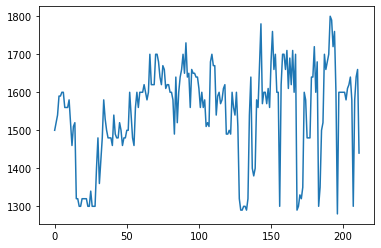

In [31]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stat, p = stats.normaltest(dataset['altitude']) # null hypothesis: x comes from a normal distribution

print('Statistics=%.3f, p-value=%.3f' % (stat, p)) 
alpha = 0.05
if p > alpha:
    print('Accepted')
else:
    print('Declined')

plt.plot(dataset['altitude'])
plt.show()


3. Check correlation of two fields

In [32]:
if (stats.normaltest(dataset['NoOfSites'])[1]>0.05 and stats.normaltest(dataset['meanmax'])[1]>0.05):
    print("Both fileds are normal")
    cor_stat, cor_p = stats.pearsonr(dataset['NoOfSites'], dataset['meanmax'])
    if cor_p > alpha:
        print("Correlation coef is 0 or it is very weak")
    else:
        print("Correlation coef is not null")

cor_stat_spearman, cor_p_spearman = stats.spearmanr(dataset['NoOfSites'], dataset['meanmax'])
if cor_p_spearman > alpha:
    print("Monotonous relation is not observed or it is very weak")
else:
    print("We can assert that there is a monotonic relation")




We can assert that there is a monotonic relation


4. Build linear regression of two fields

In [33]:
stats.linregress(dataset['NoOfPools'], dataset['altitude'])
# нахил, вільний член регресії, коеф кореляції пірсона, нахил = 0, середнє квадратичне відхилення середнього арифметичного нахилу та перетину

LinregressResult(slope=1.2560693269472536, intercept=1515.5315419968529, rvalue=0.26679133897117296, pvalue=8.385712729155014e-05, stderr=0.3131111780768005, intercept_stderr=11.43145081657961)